In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


# 解壓縮作業給的data
我把zip檔案放在雲端裡面

In [ ]:
!unzip '/content/gdrive/MyDrive/svhn_HW2/test.zip' -d '/content/gdrive/MyDrive/svhn_HW2'
!unzip '/content/gdrive/MyDrive/svhn_HW2/train.zip' -d '/content/gdrive/MyDrive/svhn_HW2'

串流輸出內容已截斷至最後 5000 行。
  inflating: /content/gdrive/MyDrive/svhn_HW2/__MACOSX/train/._27583.png  
  inflating: /content/gdrive/MyDrive/svhn_HW2/train/17440.png  
  inflating: /content/gdrive/MyDrive/svhn_HW2/__MACOSX/train/._17440.png  
  inflating: /content/gdrive/MyDrive/svhn_HW2/train/18773.png  
  inflating: /content/gdrive/MyDrive/svhn_HW2/__MACOSX/train/._18773.png  
  inflating: /content/gdrive/MyDrive/svhn_HW2/train/5107.png  
  inflating: /content/gdrive/MyDrive/svhn_HW2/__MACOSX/train/._5107.png  
  inflating: /content/gdrive/MyDrive/svhn_HW2/train/26845.png  
  inflating: /content/gdrive/MyDrive/svhn_HW2/__MACOSX/train/._26845.png  
  inflating: /content/gdrive/MyDrive/svhn_HW2/train/19479.png  
  inflating: /content/gdrive/MyDrive/svhn_HW2/__MACOSX/train/._19479.png  
  inflating: /content/gdrive/MyDrive/svhn_HW2/train/3562.png  
  inflating: /content/gdrive/MyDrive/svhn_HW2/__MACOSX/train/._3562.png  
  inflating: /content/gdrive/MyDrive/svhn_HW2/train/26689.png  
  inflatin

In [ ]:
import glob
# train和test各有多少圖片
print(len( glob.glob("/content/gdrive/MyDrive/svhn_HW2/train/*.png") ))
print(len( glob.glob("/content/gdrive/MyDrive/svhn_HW2/test/*.png") ))

33402
3669


## 減少單一資料夾檔案數目
https://chtseng.wordpress.com/2020/02/07/%E4%BD%BF%E7%94%A8google-colab%E8%A8%93%E7%B7%B4yolo/

由於數目太大會讓Colab在讀取時產生Time out的error
因此必須將這些檔案分散到子資料夾中。

新資料夾split_train

裡面有17個資料夾(0~16)

每個資料夾最多2000張照片

按照原本順序放入資料夾0~16

例:


*   dir 0: 1.png 2.png .... 2000.png
*   dir 1: 2001.png 2002.png ... 4000.png




In [ ]:
import math
if not os.path.exists('/content/gdrive/MyDrive/svhn_HW2/split_train'):
  os.makedirs('/content/gdrive/MyDrive/svhn_HW2/split_train')

#每個資料夾中各放2000張圖片
dir_count = math.ceil(len( glob.glob("/content/gdrive/MyDrive/svhn_HW2/train/*.png") )/2000)
for i in range(dir_count):
  if not os.path.exists('/content/gdrive/MyDrive/svhn_HW2/split_train/'+str(i)):
    os.makedirs('/content/gdrive/MyDrive/svhn_HW2/split_train/'+str(i))



In [ ]:
import shutil
for i in range(dir_count):
  print('dir'+str(i))
  for j in range(1,2001):
    file_n = i*2000 + j
    filename = '/content/gdrive/MyDrive/svhn_HW2/train/'+str(file_n)+'.png'
    new_name = '/content/gdrive/MyDrive/svhn_HW2/split_train/'+str(i)+'/'+str(file_n)+'.png'
    shutil.copyfile(filename, new_name)
  

dir0
dir1
dir2
dir3
dir4
dir5
dir6
dir7
dir8
dir9
dir10
dir11
dir12
dir13
dir14
dir15
dir16


FileNotFoundError: ignored

In [ ]:
print(len( glob.glob("/content/gdrive/MyDrive/svhn_HW2/split_train/16/*.png") ))

1402


## Colab與Local的路徑保持一致
https://chtseng.wordpress.com/2020/02/07/%E4%BD%BF%E7%94%A8google-colab%E8%A8%93%E7%B7%B4yolo/

在本地端建立一個資料夾
軟連結雲端

預設Google Drive mount到Colab的path為/content/gdrive/My Drive，但我們使用第三行的ln -s將/WORK1指向/content/gdrive/My Drive，因此接下來便能與Local端一樣使用相同的/WORK1/dataset路徑，便能存取/content/gdrive/My Drive/dataset。

In [ ]:
import os
os.makedirs('work1')

In [ ]:
!ln -s '/content/gdrive/MyDrive/space_Colab' /work1

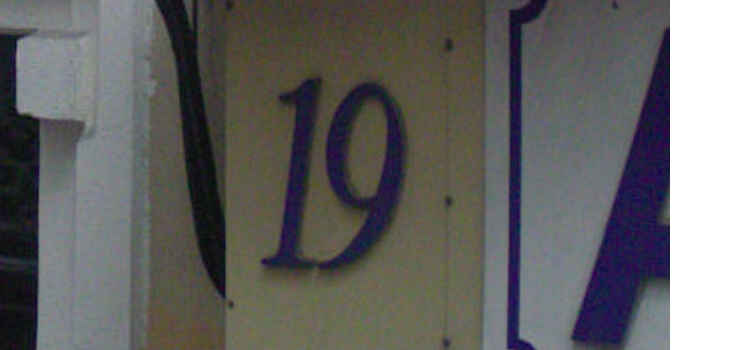

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/work1/svhn_HW2/split_train/0/1.png')
cv2_imshow(image)

## 產生訓練用的YOLO dataset及設定檔


### 處理mat檔案

https://www.itread01.com/content/1550453768.html

https://blog.csdn.net/iteapoy/article/details/117899064

In [ ]:
import h5py

hdf5_data = h5py.File('/content/gdrive/MyDrive/space_Colab/svhn_HW2/train/digitStruct.mat')

測試看看讀出來長怎樣

https://blog.csdn.net/iteapoy/article/details/117899064

In [ ]:
# 測試
hdf5_data.keys()



<KeysViewHDF5 ['#refs#', 'digitStruct']>

In [ ]:
digitStructName = hdf5_data['digitStruct']['name']
digitStructBbox = hdf5_data['digitStruct']['bbox']

In [ ]:
print(digitStructName)

<HDF5 dataset "name": shape (33402, 1), type "|O">


In [ ]:
#取得圖片檔案名稱
def getName(n):
  name=''.join([chr(v[0]) for v in hdf5_data[(digitStructName[n][0])]])
  #print(name)
  return name

In [ ]:
getName(0) #第一張圖片的名字

'1.png'

In [ ]:
#bbox
def bboxHelper(attr):
  if len(attr) > 1:
    attr = [hdf5_data[attr[j].item()][0][0] for j in range(len(attr))]
  else:
    attr = [attr[0][0]]
  return attr
def getBbox(n):
  bbox = {}
  bb = digitStructBbox[n].item()
  
  bbox['height']= bboxHelper( hdf5_data[bb]["height"] )
  bbox['label']=bboxHelper(hdf5_data[bb]["label"])
  bbox['left']=bboxHelper(hdf5_data[bb]["left"])
  bbox['top']=bboxHelper(hdf5_data[bb]["top"])
  bbox['width'] =bboxHelper(hdf5_data[bb]["width"])
  return bbox

In [ ]:
print(getName(0))
getBbox(0)

1.png


{'height': [219.0, 219.0],
 'label': [1.0, 9.0],
 'left': [246.0, 323.0],
 'top': [77.0, 81.0],
 'width': [81.0, 96.0]}

In [ ]:
print(getName(136))
getBbox(136)

137.png


{'height': [43.0, 43.0],
 'label': [1.0, 10.0],
 'left': [50.0, 70.0],
 'top': [10.0, 10.0],
 'width': [14.0, 17.0]}

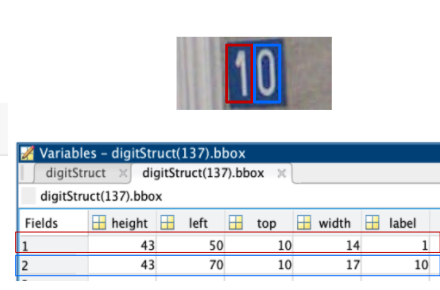

跟助教給的作業資訊一樣 應該是沒錯

要記得 index 0 是指1.png!

同理 index 136 是137.png

In [ ]:
#建立字典
img_dict = {}
for i in range(len(digitStructName)):
  img_dict[getName(i)] = getBbox(i)

In [ ]:
img_dict['1.png']

{'height': [219.0, 219.0],
 'label': [1.0, 9.0],
 'left': [246.0, 323.0],
 'top': [77.0, 81.0],
 'width': [81.0, 96.0]}

### 產生文件

區分valid跟train

我直接把原本在train資料夾中的15跟16放到valid資料夾了!


In [ ]:
import glob
n = len( glob.glob("/work1/svhn_HW2/split_valid/15/*.png") ) + len( glob.glob("/work1/svhn_HW2/split_valid/16/*.png") )
print('split_valid共有'+str(n)+'張圖片')

n = 0
for i in range(15):
  n = n + len( glob.glob("/work1/svhn_HW2/split_train/"+str(i)+"/*.png") )
print('split_train共有'+str(n)+'張圖片')

split_valid共有3402張圖片
split_train共有30000張圖片
/work1/svhn_HW2/split_train/14/29001.png


#### train.txt、valid.txt

用來告訴 darknet 你那些訓練檔案是存放在哪裡

一行一行來紀錄一張圖檔的路徑，

In [ ]:
import os
f = open('train.txt','w')
for i in range(15):
  for x in os.listdir(r'/work1/svhn_HW2/split_train/'+str(i)):
    if 'png' in x:
      f.write(r'/work1/svhn_HW2/split_train/'+str(i)+'/'+x)
      f.write('\n')
      f.close

In [ ]:
import os
f = open('valid.txt','w')

for x in os.listdir(r'/work1/svhn_HW2/split_valid/15'):
  f.write(r'/work1/svhn_HW2/split_valid/15/'+x)
  f.write('\n')
for x in os.listdir(r'/work1/svhn_HW2/split_valid/16'):
  f.write(r'/work1/svhn_HW2/split_valid/16/'+x)
  f.write('\n')

f.close()

<function TextIOWrapper.close>

#### bbox標註框文件

https://blog.csdn.net/m0_46478164/article/details/106305143

class_id應該要是0~9
所以要記得把label的10改成0

In [ ]:
import os
import cv2
import glob


# split_train bbox檔案
for d in range(15):
  print('dir'+str(d))
  for x in os.listdir(r'/work1/svhn_HW2/split_train/'+str(d)):
    
    
    if 'png' in x:
      print('/work1/svhn_HW2/split_train/'+str(d)+'/'+x)

      img = cv2.imread('/work1/svhn_HW2/split_train/'+str(d)+'/'+x)
      shape = img.shape
      
      f = open('/work1/svhn_HW2/split_train/'+str(d)+'/'+x[:-4]+'.txt','w')
      for i in range(len(img_dict[x]['label'])):
        label = img_dict[x]['label'][i]
        c_x = (img_dict[x]['left'][i]+img_dict[x]['width'][i]/2)/shape[1]
        c_y = (img_dict[x]['top'][i]+img_dict[x]['height'][i]/2)/shape[0]
        w = img_dict[x]['width'][i]/shape[1]
        h = img_dict[x]['height'][i]/shape[0]
        if label == 10:
          f.write(str(int(0))+' '+str(c_x)+' '+str(c_y)+' '+str(w)+' '+str(h))
        else:
          f.write(str(int(label))+' '+str(c_x)+' '+str(c_y)+' '+str(w)+' '+str(h))
        f.write('\n')
      f.close()

串流輸出內容已截斷至最後 5000 行。
/work1/svhn_HW2/split_train/12/24003.png
/work1/svhn_HW2/split_train/12/24004.png
/work1/svhn_HW2/split_train/12/24005.png
/work1/svhn_HW2/split_train/12/24006.png
/work1/svhn_HW2/split_train/12/24007.png
/work1/svhn_HW2/split_train/12/24008.png
/work1/svhn_HW2/split_train/12/24009.png
/work1/svhn_HW2/split_train/12/24010.png
/work1/svhn_HW2/split_train/12/24011.png
/work1/svhn_HW2/split_train/12/24012.png
/work1/svhn_HW2/split_train/12/24013.png
/work1/svhn_HW2/split_train/12/24014.png
/work1/svhn_HW2/split_train/12/24015.png
/work1/svhn_HW2/split_train/12/24016.png
/work1/svhn_HW2/split_train/12/24017.png
/work1/svhn_HW2/split_train/12/24018.png
/work1/svhn_HW2/split_train/12/24019.png
/work1/svhn_HW2/split_train/12/24020.png
/work1/svhn_HW2/split_train/12/24021.png
/work1/svhn_HW2/split_train/12/24022.png
/work1/svhn_HW2/split_train/12/24023.png
/work1/svhn_HW2/split_train/12/24024.png
/work1/svhn_HW2/split_train/12/24025.png
/work1/svhn_HW2/split_train/12/24026

In [ ]:
# split_train bbox檔案
for d in range(15,17):
  print('dri'+str(d))
  for x in os.listdir(r'/work1/svhn_HW2/split_valid/'+str(d)):
    if 'png' in x:
      print('/work1/svhn_HW2/split_valid/'+str(d)+'/'+x)

      img = cv2.imread('/work1/svhn_HW2/split_valid/'+str(d)+'/'+x)
      shape = img.shape
      
      f = open('/work1/svhn_HW2/split_valid/'+str(d)+'/'+x[:-4]+'.txt','w')
      for i in range(len(img_dict[x]['label'])):
        label = img_dict[x]['label'][i]
        c_x = (img_dict[x]['left'][i]+img_dict[x]['width'][i]/2)/shape[1]
        c_y = (img_dict[x]['top'][i]+img_dict[x]['height'][i]/2)/shape[0]
        w = img_dict[x]['width'][i]/shape[1]
        h = img_dict[x]['height'][i]/shape[0]
        if label == 10:
          f.write(str(int(0))+' '+str(c_x)+' '+str(c_y)+' '+str(w)+' '+str(h))
        else:
          f.write(str(int(label))+' '+str(c_x)+' '+str(c_y)+' '+str(w)+' '+str(h))
        f.write('\n')
      f.close()

dri15
/work1/svhn_HW2/split_valid/15/31001.png
/work1/svhn_HW2/split_valid/15/31002.png
/work1/svhn_HW2/split_valid/15/31003.png
/work1/svhn_HW2/split_valid/15/31004.png
/work1/svhn_HW2/split_valid/15/31005.png
/work1/svhn_HW2/split_valid/15/31006.png
/work1/svhn_HW2/split_valid/15/31007.png
/work1/svhn_HW2/split_valid/15/31008.png
/work1/svhn_HW2/split_valid/15/31009.png
/work1/svhn_HW2/split_valid/15/31010.png
/work1/svhn_HW2/split_valid/15/31011.png
/work1/svhn_HW2/split_valid/15/31012.png
/work1/svhn_HW2/split_valid/15/31013.png
/work1/svhn_HW2/split_valid/15/31014.png
/work1/svhn_HW2/split_valid/15/31015.png
/work1/svhn_HW2/split_valid/15/31016.png
/work1/svhn_HW2/split_valid/15/31017.png
/work1/svhn_HW2/split_valid/15/31018.png
/work1/svhn_HW2/split_valid/15/31019.png
/work1/svhn_HW2/split_valid/15/31020.png
/work1/svhn_HW2/split_valid/15/31021.png
/work1/svhn_HW2/split_valid/15/31022.png
/work1/svhn_HW2/split_valid/15/31023.png
/work1/svhn_HW2/split_valid/15/31024.png
/work1/svh

#### obj.data
用來告訴 darknet 這套深度學習框架，其他用來訓練的檔案資源擺在哪邊、偵測物件的類別數量以及訓練權重該備份到哪個位置去，就有點像檔案目錄的感覺

In [ ]:
f = open('obg.names','w')
f.write('10\n')
f.write('1\n')
f.write('2\n')
f.write('3\n')
f.write('4\n')
f.write('5\n')
f.write('6\n')
f.write('7\n')
f.write('8\n')
f.write('9\n')
f.close()

In [ ]:
f = open('obg.data','w')
f.write('classes = 10\n')
f.write('train = train.txt\n')
f.write('valid = valid.txt\n')
f.write('svhn_HW2/obj.names\n')
f.write('svhn_HW2/weight\n')
f.close()

In [ ]:
f = open('yolov4.cfg','w')
f.write('classes = 10\n')
[net]
# Testing
#batch=1
#subdivisions=1
# Training
batch=64
subdivisions=2
width=320
height=320
channels=3
f.close()

記得把這些檔案下載下來放到雲端